In [1]:
import pandas as pd
import pandas

In [2]:


clf_data_df = pandas.read_excel('DAPL - DAT - 5 NBC - eStore.xlsx',
                                sheet_name='ClassificationData')
clf_data_df

,Case,BK,STA,DVD,EDV,BG,HF,CLT,Cluster,Gender,Age
0,1,0,0,3148,3305,0,0,0,2,1,27
1,2,0,0,3099,3254,0,0,0,2,1,31
2,3,1688,0,0,0,0,0,0,3,1,26
3,4,0,0,0,0,0,0,3719,1,1,22
4,5,3212,1251,2377,5548,0,0,0,2,1,32
...,...,...,...,...,...,...,...,...,...,...,...
91,92,0,0,3137,3294,0,0,0,2,2,50
92,93,0,0,0,0,0,0,3725,1,2,32
93,94,1773,0,0,0,0,0,0,3,2,40
94,95,0,0,0,0,3278,1903,0,3,2,45


In [3]:
clf_data_df.columns

Index(['Case', 'BK', 'STA', 'DVD', 'EDV', 'BG', 'HF', 'CLT', 'Cluster',
       'Gender', 'Age'],
      dtype='object')

In [4]:
X = clf_data_df[[ 'BK', 'STA', 'DVD', 'EDV', 'BG', 'HF', 'CLT','Gender', 'Age']]
y =   clf_data_df[[ 'Cluster']]

In [5]:
clf_data_df[ 'Cluster'].unique()

array([2, 3, 1])

In [6]:
# BK	Books
# STA	Stationery
# DVD	Music/Movie DVD
# EDV	Electronic devices
# BG	Beauty/Grooming
# HF	Health food
# CLT	Clothes

In [7]:
# naive bayes classifier

In [8]:
# logistic regression

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [11]:
classifier = GaussianNB()

In [12]:
classifier.fit(X_train, Y_train)

/Users/srimugunthan/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [13]:
test_predictions = classifier.predict(X_test)

In [14]:
target_names=['1', '2', '3']
from sklearn.metrics import classification_report
print(classification_report(Y_test, test_predictions,target_names=target_names))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        12

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



<AxesSubplot: >

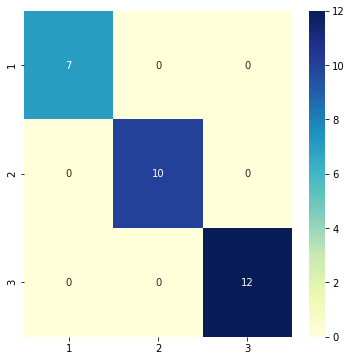

In [15]:
x_axis_labels = ['1', '2', '3']
y_axis_labels = ['1', '2', '3']
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confMatTest = confusion_matrix(Y_test, test_predictions)
confAccTest = confMatTest.astype('float') / confMatTest.sum(axis=1)
plt.figure(figsize = (6,6))
sns.heatmap(confMatTest, xticklabels=x_axis_labels, yticklabels=target_names, annot=True,  cmap="YlGnBu",fmt='.0f')

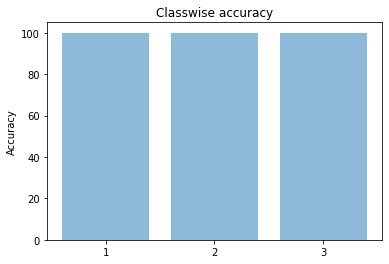

In [18]:
accdfTest = confAccTest.diagonal()
accTest = pd.DataFrame(list(zip(x_axis_labels[0:3], list(accdfTest[0:3]*100))),
              columns=['Label','Accuracy'])

fig = plt.figure(figsize=(6,4))
plt.bar( accTest["Label"],accTest["Accuracy"], align='center', alpha=0.5)
plt.ylabel('Accuracy')
plt.title('Classwise accuracy')
plt.show()